In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## 1. Cargamos datos
  Hemos extraido los datos de la Api https://api.covidtracking.com donde la cual han recabado información sobre los datos
relativos a la incidencia de Covid19 históricos por estado.

In [17]:
uploaded = files.upload()
df = pd.read_csv('daily.csv')

In [18]:
df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

In [20]:
df

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
416,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
417,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
418,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


## 2. Análisis Univariante no gráfico

In [21]:
df.describe()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,totalTestResults,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.200000e+02,420.000000,4.190000e+02,3.720000e+02,369.000000,356.000000,369.000000,347.000000,348.000000,348.000000,...,369.000000,4.200000e+02,0.0,420.0,420.0,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,2.020218e+07,49.476190,8.116687e+06,3.030351e+07,9617.308943,57987.117978,310817.140921,12059.227666,21059.344828,3975.298851,...,310817.140921,1.073369e+08,NaN,0.0,0.0,1226.550000,1848.478571,177578.154762,68467.830952,8.662503e+05
std,3.472227e+03,16.896764,8.967432e+06,2.407815e+07,9920.899709,31898.555998,235557.870159,5668.415483,13572.638376,2191.080602,...,235557.870159,1.129172e+08,NaN,0.0,0.0,1070.129644,1708.460481,121544.473208,68682.221496,6.579460e+05
min,2.020011e+07,1.000000,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,4.000000,0.000000e+00,NaN,0.0,0.0,0.000000,-2858.000000,-658774.000000,0.000000,0.000000e+00
25%,2.020043e+07,56.000000,1.004386e+06,6.753778e+06,3377.000000,35100.500000,123250.000000,7495.500000,9900.250000,2168.500000,...,123250.000000,5.888598e+06,NaN,0.0,0.0,439.750000,765.750000,79236.750000,22462.500000,2.388558e+05
50%,2.020081e+07,56.000000,5.044337e+06,2.757246e+07,9939.000000,48811.000000,280138.000000,10114.000000,18797.500000,3186.500000,...,280138.000000,6.839699e+07,NaN,0.0,0.0,1016.000000,1490.000000,206620.000000,44664.500000,8.223685e+05
75%,2.020112e+07,56.000000,1.234137e+07,5.084301e+07,11957.000000,70519.250000,481309.000000,15596.500000,32998.500000,5828.500000,...,481309.000000,1.854937e+08,NaN,0.0,0.0,1642.500000,2467.000000,260621.000000,89684.250000,1.401706e+06
max,2.021031e+07,56.000000,2.875649e+07,7.458282e+07,65698.000000,132474.000000,776361.000000,23912.000000,45475.000000,8004.000000,...,776361.000000,3.638251e+08,NaN,0.0,0.0,5427.000000,17155.000000,480256.000000,295121.000000,2.309884e+06


Aquí podemos ver que:
 1. las fechas donde se recaba la información es entre el 2020 y el 2021.
 2. El máximo de personas hospitalizadas fue de 776.361
 3. Hubo un total de 515.151 personas que murieron entorno a estas fechas por causas confirmadas o probable del Covid-19
 ### Analicemos esto:
1. Casos Positivos:
- Media: ~8.1 millones
- Máximo: 28.75 millones
- Mínimo: 0 (probablemente debido a valores faltantes o datos iniciales)
- Mediana (50%): ~5.04 millones
2. Muertes:
- Media: ~187,211
- Máximo: 515,151
- Mínimo: 0 (probablemente debido a valores faltantes)
- Mediana (50%): ~169,119
3. Hospitalizaciones Actuales:
- Media: ~57,987
- Máximo: 132,474
- Mínimo: 325
- Mediana (50%): ~48,811
4. Pacientes en UCI:
- Media: ~12,059
- Máximo: 23,912
- Mínimo: 1,299
- Mediana (50%): ~10,114




## 3. Análisis con Gráficos:


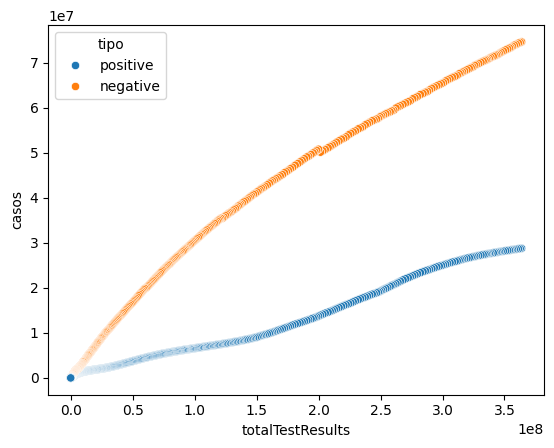

In [22]:
# Replicating melt using stack and reset_index
df_melted = df.set_index('totalTestResults')[['positive', 'negative']].stack().reset_index()
df_melted.columns = ['totalTestResults', 'tipo', 'casos']  # Renaming columns

sns.scatterplot(x='totalTestResults', y='casos', hue='tipo', data=df_melted)
plt.show()

Aqui podemos ver que en los casos totales de los Test, los resultados positivos y negativos han habído mas casos negativos que positivos

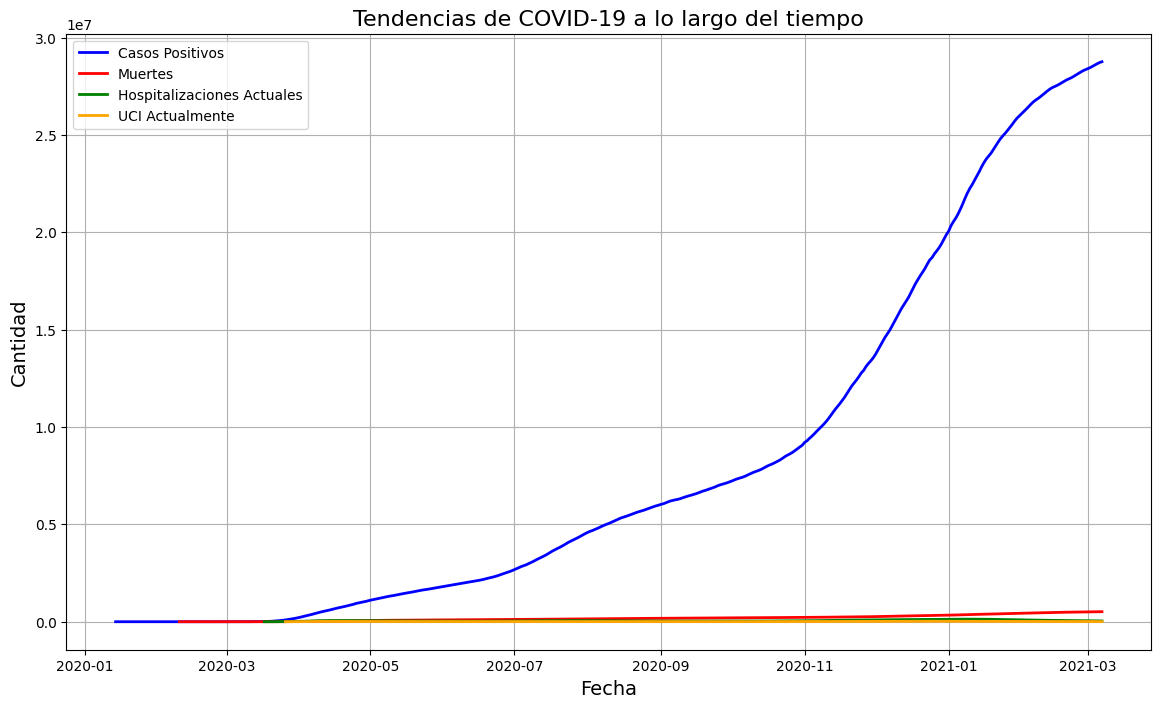

In [23]:
# Convert the 'date' column to datetime format for easier analysis
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Set the date as the index for easier plotting
df.set_index('date', inplace=True)

# Plot the trends of key variables over time
plt.figure(figsize=(14, 8))

# Plot positive cases
plt.plot(df.index, df['positive'], label='Casos Positivos', color='blue', linewidth=2)

# Plot deaths
plt.plot(df.index, df['death'], label='Muertes', color='red', linewidth=2)

# Plot hospitalizations
plt.plot(df.index, df['hospitalizedCurrently'], label='Hospitalizaciones Actuales', color='green', linewidth=2)

# Plot ICU cases
plt.plot(df.index, df['inIcuCurrently'], label='UCI Actualmente', color='orange', linewidth=2)

plt.title('Tendencias de COVID-19 a lo largo del tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

En este Gráfico podemos ver que en las fechas 2020 hasta el 2021 los casos de positivo han ido en aumento, pero los casos de muerte han sido muy pocos a comparar de los caos totales, al igual que las hospitalizaciones se han ido manteniendo durante el tiempo y sus ingresos en la uci igual, pero las muertes se fueron elevando ya sobre el 2021

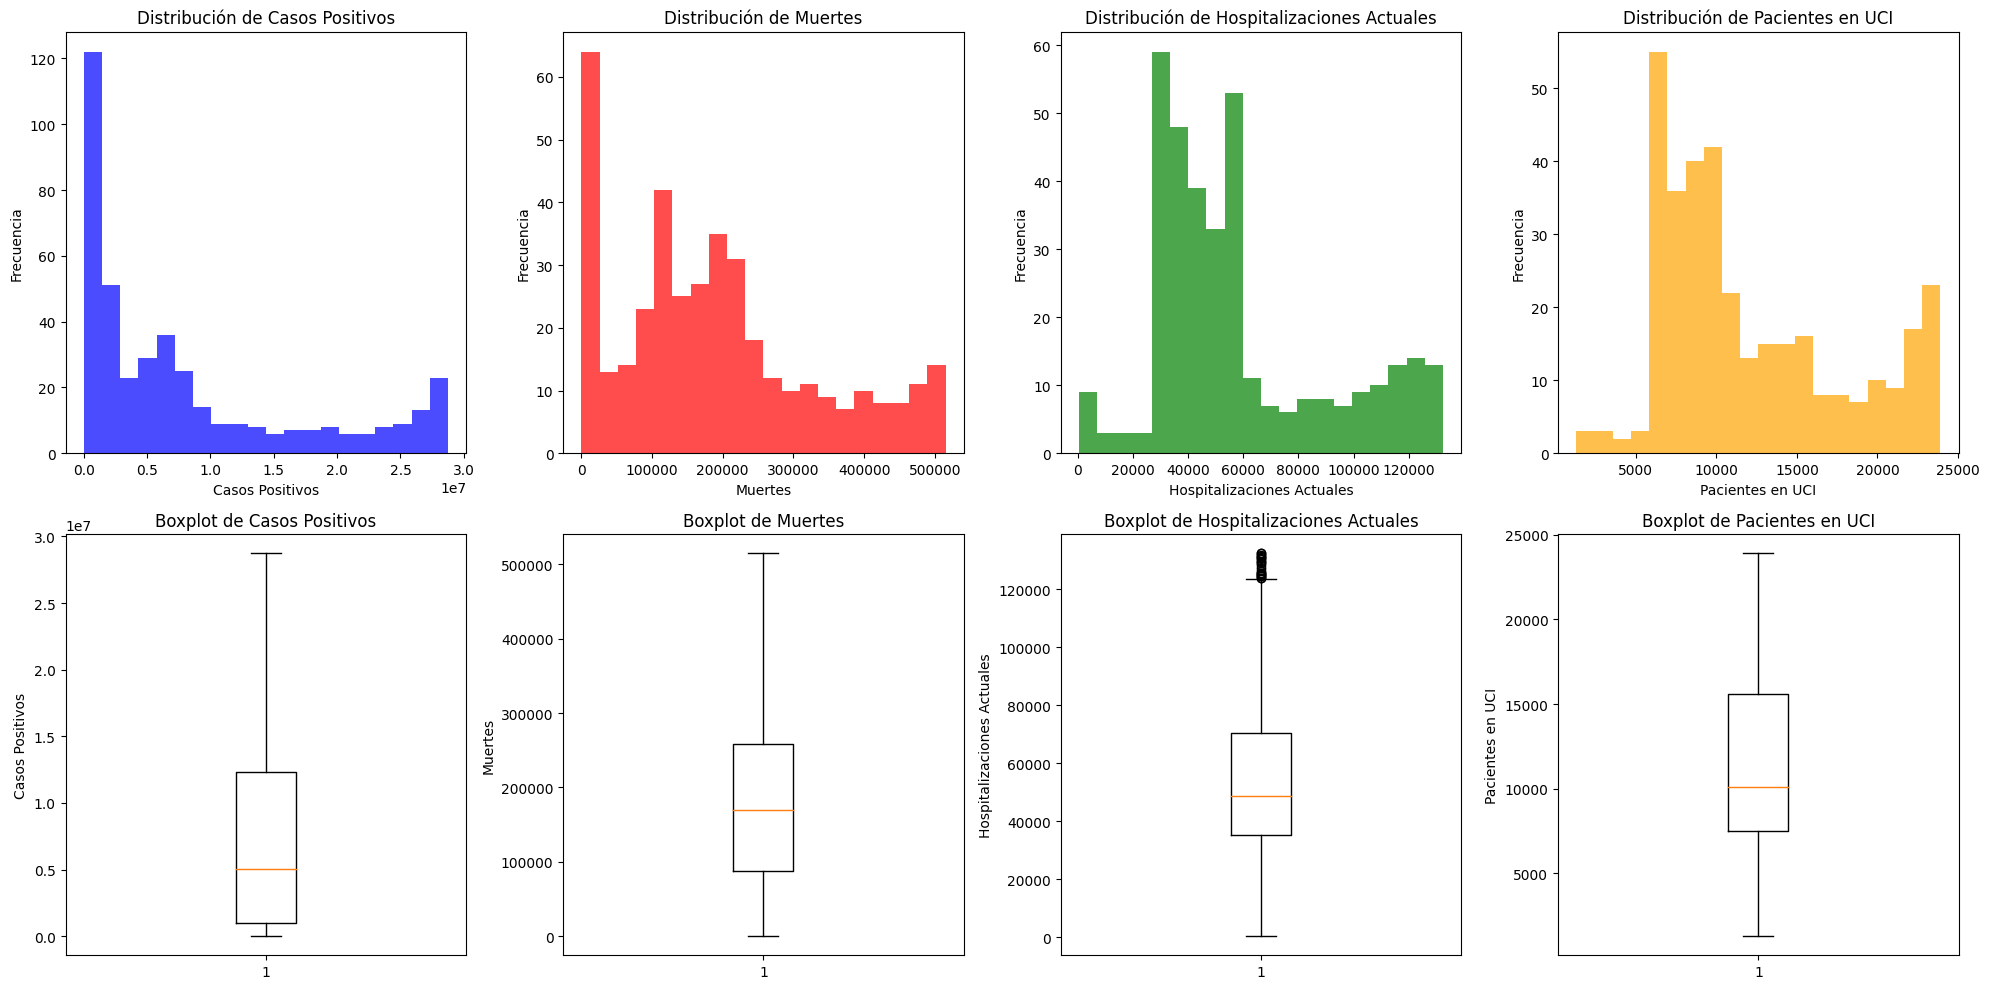

<Axes: >

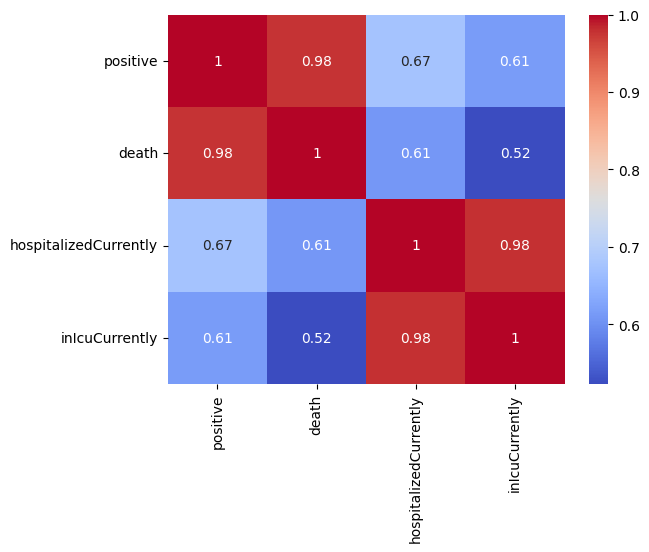

In [24]:
# Crear histogramas y boxplots para visualizar las distribuciones

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Histograma y boxplot de Casos Positivos
axs[0, 0].hist(df['positive'].dropna(), bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Distribución de Casos Positivos')
axs[0, 0].set_xlabel('Casos Positivos')
axs[0, 0].set_ylabel('Frecuencia')
axs[1, 0].boxplot(df['positive'].dropna())
axs[1, 0].set_title('Boxplot de Casos Positivos')
axs[1, 0].set_ylabel('Casos Positivos')

# Histograma y boxplot de Muertes
axs[0, 1].hist(df['death'].dropna(), bins=20, color='red', alpha=0.7)
axs[0, 1].set_title('Distribución de Muertes')
axs[0, 1].set_xlabel('Muertes')
axs[0, 1].set_ylabel('Frecuencia')
axs[1, 1].boxplot(df['death'].dropna())
axs[1, 1].set_title('Boxplot de Muertes')
axs[1, 1].set_ylabel('Muertes')

# Histograma y boxplot de Hospitalizaciones Actuales
axs[0, 2].hist(df['hospitalizedCurrently'].dropna(), bins=20, color='green', alpha=0.7)
axs[0, 2].set_title('Distribución de Hospitalizaciones Actuales')
axs[0, 2].set_xlabel('Hospitalizaciones Actuales')
axs[0, 2].set_ylabel('Frecuencia')
axs[1, 2].boxplot(df['hospitalizedCurrently'].dropna())
axs[1, 2].set_title('Boxplot de Hospitalizaciones Actuales')
axs[1, 2].set_ylabel('Hospitalizaciones Actuales')

# Histograma y boxplot de Pacientes en UCI
axs[0, 3].hist(df['inIcuCurrently'].dropna(), bins=20, color='orange', alpha=0.7)
axs[0, 3].set_title('Distribución de Pacientes en UCI')
axs[0, 3].set_xlabel('Pacientes en UCI')
axs[0, 3].set_ylabel('Frecuencia')
axs[1, 3].boxplot(df['inIcuCurrently'].dropna())
axs[1, 3].set_title('Boxplot de Pacientes en UCI')
axs[1, 3].set_ylabel('Pacientes en UCI')

plt.tight_layout()
plt.show()

# Matriz de correlación entre las variables
correlacion = df[['positive', 'death', 'hospitalizedCurrently', 'inIcuCurrently']].corr()

correlacion
sns.heatmap(correlacion, annot=True, cmap='coolwarm')

### Análisis de los histogramas y boxplot
1. Distribución de Casos Positivos:
- Histograma: La mayoría de los datos están concentrados en valores más bajos (por debajo de los 5 millones), con algunos valores elevados hasta los 28 millones. La distribución es asimétrica hacia la derecha, indicando que la mayoría de los días reportaron menos casos en comparación con los picos máximos.
- Boxplot: Refleja que la mediana está alrededor de 5 millones de casos, y aunque hay una gran dispersión, no se observan outliers significativos en los datos.
2. Distribución de Muertes:
- Histograma: Similar a los casos positivos, la mayoría de los datos están concentrados en valores bajos (menos de 100,000 muertes), pero se observan algunos picos hasta 500,000 muertes. La distribución también es asimétrica hacia la derecha.
- Boxplot: La mediana está alrededor de 170,000 muertes. El rango de valores es amplio, pero al igual que los casos positivos, no parece haber outliers significativos.
3. Distribución de Hospitalizaciones Actuales:
- Histograma: La distribución muestra dos picos principales, con un número significativo de días con hospitalizaciones alrededor de los 40,000 y 60,000 casos, con un rango que se extiende hasta 120,000 hospitalizaciones.
- Boxplot: La mediana de hospitalizaciones está cerca de los 50,000 casos. Hay algunos outliers que superan los 120,000 casos, lo que sugiere que hubo días con números excepcionalmente altos de hospitalizaciones.
4. Distribución de Pacientes en UCI:
- Histograma: Similar a las hospitalizaciones, hay una distribución bimodal, con concentraciones alrededor de 10,000 y 20,000 pacientes en UCI.
- Boxplot: La mediana está en torno a los 10,000 pacientes en UCI, y el rango de valores es bastante amplio, desde 5,000 hasta 25,000. No se observan outliers significativos.
-
5. Conclusión General:
  Las distribuciones muestran un comportamiento que sugiere diferentes fases o picos de la pandemia, con la mayoría de los días reportando casos y muertes en niveles moderados, pero con picos notables en algunas fechas específicas. El análisis del boxplot también sugiere que, aunque hay variabilidad en las cifras, los valores extremos (outliers) no son tan frecuentes, excepto en el caso de hospitalizaciones

### Análisis de la matrix de correlación entre las variables
- positive vs. death (0.98): Hay una correlación muy alta (0.98) entre el número de casos positivos y el número de muertes. Esto sugiere que a medida que aumentan los casos positivos, también lo hacen las muertes.
- hospitalizedCurrently vs. inIcuCurrently (0.98): También hay una correlación muy alta (0.98) entre el número de personas hospitalizadas y el número de personas en la UCI. Esto es lógico, ya que muchas de las personas hospitalizadas debido a COVID-19 pueden necesitar cuidados intensivos.
- positive vs. hospitalizedCurrently (0.67): Hay una correlación positiva moderada (0.67) entre los casos positivos y las hospitalizaciones actuales, lo que sugiere que un aumento en los casos positivos también tiende a estar relacionado con un aumento en las hospitalizaciones, aunque no de manera tan fuerte como con las muertes.
- death vs. hospitalizedCurrently (0.61): Existe una correlación moderada (0.61) entre las muertes y las hospitalizaciones, lo que indica que a medida que aumenta el número de hospitalizaciones, también puede aumentar el número de muertes.
- inIcuCurrently vs. death (0.52): Hay una correlación positiva pero más baja (0.52) entre el número de personas en la UCI y las muertes. Esto sugiere que no todos los pacientes en la UCI necesariamente fallecen, pero hay cierta relación.

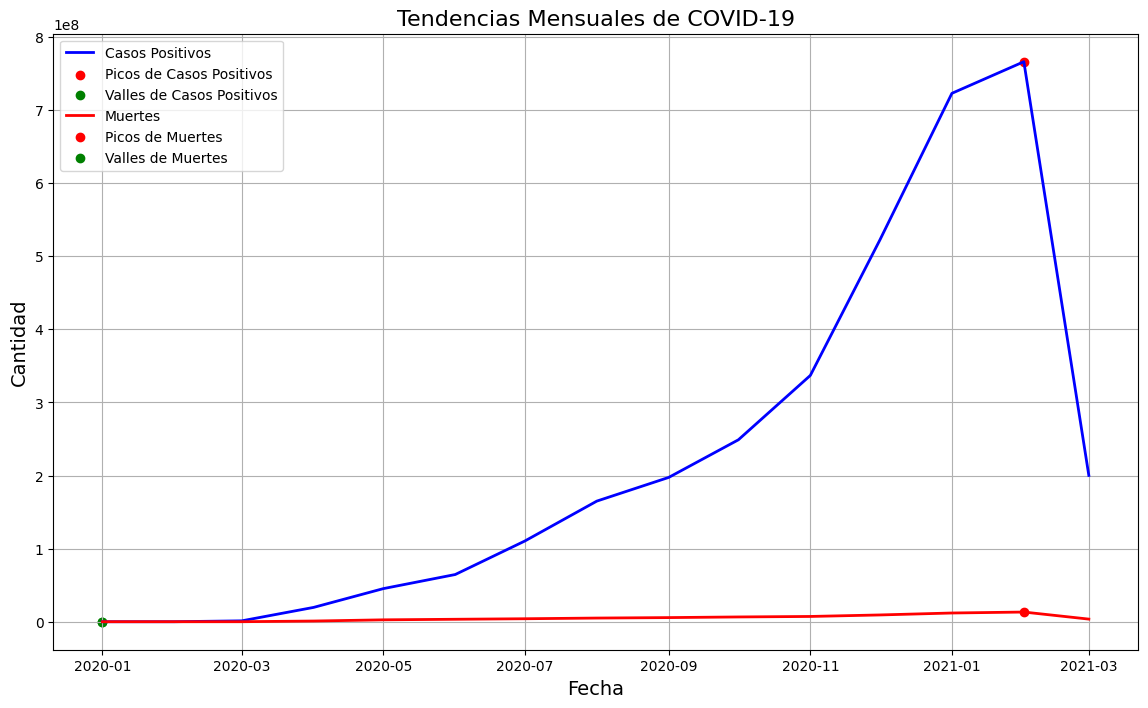

In [27]:
# Cargar los datos del archivo CSV
df = pd.read_csv('daily.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
# extraemos año y mes de la columna date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# agrupamos por año y mes, sumamos los valores de las columnas relevantes
monthly_data = df.groupby(['year', 'month']).agg({
    'positive': 'sum',
    'death': 'sum',
    'hospitalizedCurrently': 'mean',
    'inIcuCurrently': 'mean'
}).reset_index()

# crear una nueva columna de fecha para la agrupación mensual
monthly_data['fecha'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))
# identificamos picos y valles
# encontramos el mes con el máximo número de casos positivos
max_positive_month = monthly_data.loc[monthly_data['positive'].idxmax()]
# econtramos el mes con el mínimo número de casos positivos
min_positive_month = monthly_data.loc[monthly_data['positive'].idxmin()]
# encontramos el mes con el máximo número de muertes
max_death_month = monthly_data.loc[monthly_data['death'].idxmax()]
# econtramos el mes con el mínimo número de muertes
min_death_month = monthly_data.loc[monthly_data['death'].idxmin()]

# visualización de los datos agregados mensualemnte
plt.figure(figsize=(14, 8))

# casos positivos por mes
plt.plot(monthly_data['fecha'], monthly_data['positive'], label='Casos Positivos', color='blue', linewidth=2)
plt.scatter(max_positive_month['fecha'], max_positive_month['positive'], color='red', label='Picos de Casos Positivos')
plt
plt.scatter(min_positive_month['fecha'], min_positive_month['positive'], color='green', label='Valles de Casos Positivos')

# muertes por mes
plt.plot(monthly_data['fecha'], monthly_data['death'], label='Muertes', color='red', linewidth=2)
plt.scatter(max_death_month['fecha'], max_death_month['death'], color='red', label='Picos de Muertes')
plt.scatter(min_death_month['fecha'], min_death_month['death'], color='green', label='Valles de Muertes')

plt.title('Tendencias Mensuales de COVID-19', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## Descripción del gráfico:
En este gráfico podemos ver las tendencias mensuales de casos positivos y muertes por el COVID-19 desde enero de 2020 hasta marzo de 2021. En el eje x vemos las fechas en meses, y en el eje y se ven las cantidades de positivos y muertes.
1. Casos Positivos:
- La línea azul representa la evolución mensual de los casos positivos.
- El marcador rojo en la línea azul indica el pico máximo de casos positivos, que ocurrió en diciembre de 2020.
- El marcador verde indica el valle mínimo, es decir, el punto más bajo en la línea, que ocurrió en enero de 2020.
2. Muertes:
- La línea roja representa la evolución mensual de las muertes.
- El marcador rojo en la línea roja indica el pico máximo de muertes, que también ocurrió en enero de 2021.
- El marcador verde muestra el valle mínimo de muertes, que ocurrió en enero de 2020.
### Análisis del gráfico:
Con el creTambécimiento de casos positivos podemos observar un aumento progresivo en el número de casos a lo largo de 2020 alcanzando su punto más alto en diciembre de 2020 que coincide con la propagación mas intensa en la segunda mitad del 2020.
Los casos de muertes siguen un patron similar llegando su pico en enero del 2021, este retraso en el pico de muertes respecto a los casos de positivos es normal ya que sucedería las muertes semanas despúes de que se reportaran esos positivos.
Podemos deducir con esto que el impacto más severo ocurrido puede estar relacionado con las fiestas de diciembre donde se juntaban más personas y aumento su contagio y posterior mente un aumento de las muertes. Apartir de enero de 2021 se ve que disminuye debido a la implementación de las medidas restrictivas como el confinamiento y las campañas de vacunación.


# Conclusión:
El análisis de los datos de COVID-19 a lo largo del tiempo, representado mediante las diferentes gráficas desarrolladas, nos ofrece una visión clara de la evolución de la pandemia y su impacto en términos de casos positivos, muertes, hospitalizaciones y pacientes en unidades de cuidados intensivos (UCI).
1. Tendencia de Casos Positivos y Muertes
- Crecimiento Exponencial: Durante el período comprendido entre principios de 2020 y principios de 2021, observamos un crecimiento exponencial en el número de casos positivos de COVID-19, alcanzando su punto máximo en diciembre de 2020. Este aumento coincide con los picos de las oleadas de contagios, posiblemente relacionados con factores estacionales, mayor movilidad y relajación de las medidas de control social.
- Impacto en Muertes: Las muertes por COVID-19 siguieron una tendencia similar pero con un ligero desfase temporal respecto a los casos positivos, alcanzando su punto más alto en enero de 2021. Esto refleja el tiempo que toma para que las complicaciones severas resulten en muertes tras el contagio. La fuerte correlación observada entre los casos y las muertes subraya la letalidad del virus en contextos de alta transmisión.
2. Hospitalizaciones y UCI
- Sobrecarga del Sistema de Salud: A lo largo de la pandemia, los hospitales y las unidades de cuidados intensivos experimentaron una presión significativa, especialmente durante los picos de contagios. Las hospitalizaciones y el ingreso a UCI aumentaron significativamente durante los picos de la pandemia, reflejando la gravedad de la enfermedad en una proporción de la población infectada.
- Correlación con los Casos: Existe una fuerte correlación entre el número de hospitalizaciones y los casos positivos, indicando que el aumento en los contagios llevó directamente a una mayor demanda de atención médica intensiva.
3. Identificación de Picos y Valles
- Picos Críticos: Los datos muestran claramente que los momentos críticos de la pandemia se dieron en los últimos meses de 2020 y principios de 2021, donde los picos de casos positivos y muertes fueron más altos. Estas fechas coinciden con periodos de mayor interacción social, como las fiestas de fin de año, lo que sugiere que estos eventos actuaron como catalizadores del contagio.
- Valles: Los valles, o los puntos más bajos en los datos, se observaron al inicio de la pandemia, lo que corresponde a los primeros meses cuando el virus aún no se había extendido de manera generalizada.
4. Impacto de Medidas de Control
- Efectividad de las Medidas: A partir de enero de 2021, se observa una disminución en los casos positivos y en las muertes, lo que sugiere que las medidas implementadas, como confinamientos y el inicio de la vacunación en algunos países, comenzaron a tener un efecto positivo en la reducción de la propagación del virus y en la mitigación de su impacto más severo.
5. Implicaciones Futuras
- Preparación y Respuesta: Los datos y análisis muestran la importancia de una respuesta rápida y efectiva ante el aumento de casos, especialmente para evitar la sobrecarga del sistema de salud. Los picos identificados deberían servir como referencia para planificar futuros esfuerzos de mitigación y para preparar los sistemas de salud para posibles oleadas adicionales.
- Monitoreo Continuo: A pesar de la disminución observada hacia el final del período, es esencial mantener un monitoreo continuo y estar preparados para ajustar las medidas de salud pública según sea necesario.

### Conclusión Final:
El análisis de la evolución de la pandemia de COVID-19 revela patrones claros de crecimiento y declive que están intrínsecamente ligados a las políticas de salud pública, el comportamiento social, y la capacidad de respuesta del sistema de salud. La información extraída de estos datos es crucial no solo para entender lo que ha sucedido, sino también para guiar futuras estrategias de prevención y control de pandemias.